### Student details

Student name: 

Student ID: 

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np




### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1) # if female then 1, else -1

Defining showScatterPlot method, which is used in the code below inorder to depict the scatter plot with a legend

In [4]:
import matplotlib.pyplot as plt

def show_scatter_plot(x_coordinate, y_coordinate, location, title, sex) :
    c = []
    colormap = {-1: 'red', 1: 'blue'}
    valuemap = {-1: 'Male', 1: 'Female'}
    
    plt.scatter(x_coordinate, y_coordinate, c=[colormap[pred] for pred in sex], alpha=.4) # we maintain the same color mapping we used earlier using colormap to maintain the understanding of the data.

    # a way to provide legend when handling scatter plot, here we take the colormap we created and iterate through them and say which label corresponds to which item
    legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=valuemap[value], markersize=10, 
                                markerfacecolor=color) 
                                for value, color in colormap.items()]
    plt.legend(handles= legend_handles, loc = location)
    plt.xlabel('Height [cm]')
    plt.ylabel('Weight [Kg]')
    plt.title(title)
    plt.show()



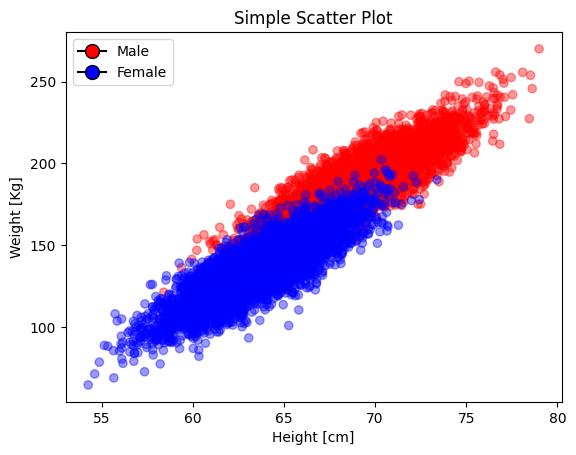

In [5]:
"""The Height and weight aspects provided are incorrectly named as per intuition. However I assume that is by design(ie. the people with weight 250 and height 80 are relatively less in the population)"""
show_scatter_plot(X[:,0], X[:,1], 'upper left', 'Simple Scatter Plot', y) #show scatter plot of male and female data

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [6]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [7]:
################################
# Your code here

# using the Perceptron we created we train the model and predict the sex of the individual
ppn = Perceptron()
train = ppn.train(X_train, y_train)
y_pred = train.predict(X_test)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [8]:
################################
# Your code here
# calculating the accuracy score using the sklearn.metrics.accuracy_score for the predicted vs trained
from sklearn.metrics import accuracy_score

print("The accuracy score is", accuracy_score(y_test, y_pred))

The accuracy score is 0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

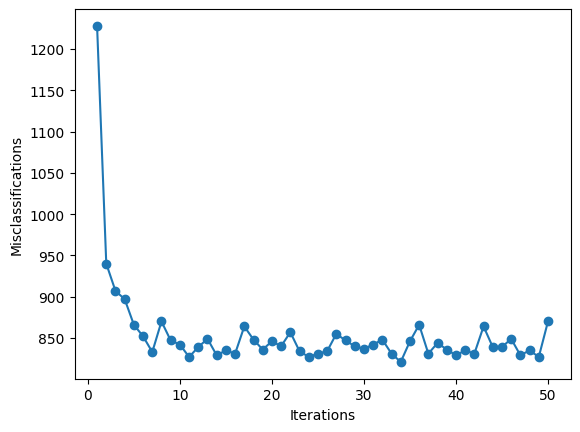

In [9]:
################################
# Your code here

# plotting the error/misclassifications on each epoch/iterations that the perceptron was trained on.
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


Creating 5000 new input and testing the data with the Scatter Plot

In [10]:

np.random.seed(0)
new_height = np.random.uniform(54,78, size=(5000)) # choosing uniform distribution to create sample heights and weights
new_weight = np.random.uniform(64,280, size=(5000))

new_X = np.column_stack((new_height, new_weight)) # using np.column_stack to make single 2-D array(ref: https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)

new_y_pred = train.predict(new_X)               # predicting the new data(sex of the individual)

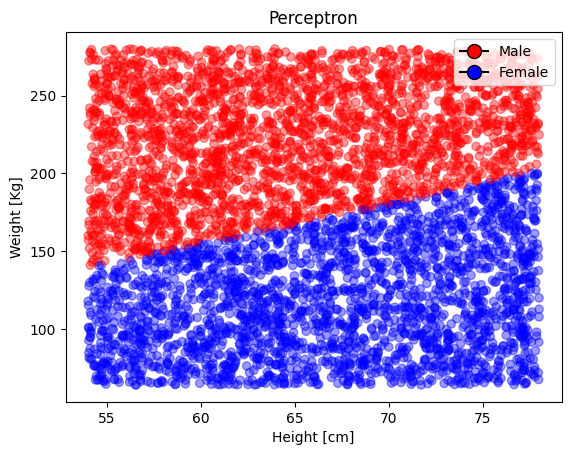

In [11]:

show_scatter_plot(new_height, new_weight, 'upper right', 'Perceptron', new_y_pred)

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1. As the training continues the perceptron iterates over the trainig data and for each training sample, it calculates the prediction and updates the weights, provided there is misclassification and counts the errors. It is on the basis of these errors it modifies the weights. It then uses these weights to adjust its prediction.  

No, we do not arrive at the optimal solution at epoch 50 and there are many epochs with lower error. This is because as per the perceptron learning rule, the weights gets updated depending on the data it already has. If the prediction made at 49th epoch is leading to a higher weight due to the fact that the data being corrupt or it being an outlier data, then it would learn from that and overcorrect. Hence the weight would be incorrectly adjusted  

We cannot obtain zero error with this data because here the data cannot be divided by a single plane/line as male or female. ie. there are males and females with a similar height and weight. Hence using a simple perceptron the weights assigned would always be incorrect. The best we can obtain is a value close to an acceptable error.  

2. Create a copy of the Perceptron class, and rename it to something reasonable, like PerceptronEE. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.

In [12]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50, acceptable_error=0):
        self.eta = eta
        self.epochs = epochs
        self.acceptable_error = acceptable_error

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            if (errors <= self.acceptable_error and errors != 0) : # defining a simple early exit criterion where we define the end of training when error <= acceptable error which is passed to the Perceptron on initialization
                break
            self.errors_.append(errors)
            

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [13]:
ppn = PerceptronEE(epochs=50, eta=0.01, acceptable_error=830) # initializing the the perceptron for Early Exit with the acceptable_error defined as 830.
train = ppn.train(X_train, y_train) # training and predicting for the new data
y_pred = train.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score # calculating accuracy_score

print("The accuracy score is", accuracy_score(y_test, y_pred)) # calculating accuracy

The accuracy score is 0.8784848484848485


[1228, 940, 907, 897, 866, 852, 833, 870, 847, 842]


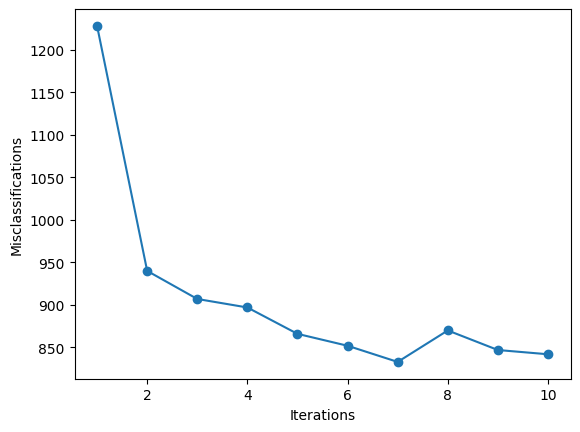

In [15]:

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
print(ppn.errors_)
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [16]:
np.random.seed(0)
new_height_EE = np.random.uniform(54,78, size=(5000)) # choosing uniform distribution to create sample heights and weights
new_weight_EE = np.random.uniform(64,280, size=(5000))

new_X_EE = np.column_stack((new_height_EE, new_weight_EE)) # using np.column_stack to make single 2-D array(ref: https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)

new_y_pred_EE = train.predict(new_X_EE)       # predict the data based on the training of the Perceptron

Representing the data in a scatter plot with the legend

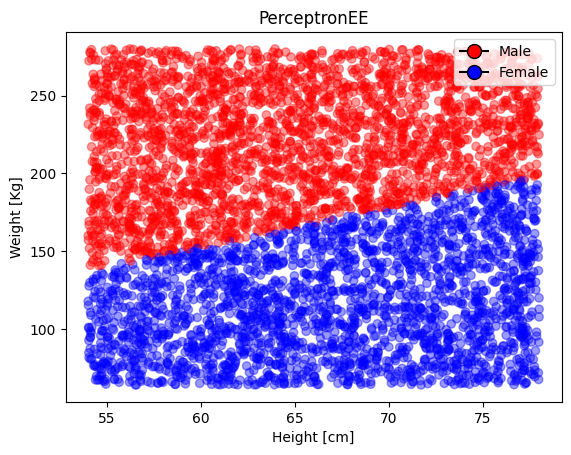

In [17]:

show_scatter_plot(new_height_EE, new_weight_EE, 'upper right', 'PerceptronEE', new_y_pred_EE)